# FINM 25000 - Summer 2025
### Instructor: Mark Hendricks

## Homework #3

**Background Case**: Smart Beta Exchange-Traded Funds and Factor Investing

No need to study/review the entire case and all the exhibits beyond what is useful in addressing the
homework questions. But they are interesting and very informative if you are inclined.

## 1. Factor Investing 

*This section is not graded, and you do not need to submit your answers. We will discuss these issues in class.*

1. **Describe the four factors**: Market, Size, Value, and Momentum.

- Market: the relative exposure of a firm's stock return with a market portfolio (i.e. the S&P 500)

- Size: the size of a firm as measured by its market capitalization

- Value: the ratio of a firm's book value (assets - liabilities) to its market capitalization (B/M ratio)

- Momentum: stocks that have a large price appreciation in one year continue to have high price appreciation the following year and stocks with negative or lower appreciation continue to do so the following year

Are they constructed from portfolios going long stocks or portfolios that go long some stocks and short others?
   - They are constructed from portfolio that go long some stocks and short some other stocks

What is the point of figures 1–6?
   - They provide a visual understanding of the real returns given the provided factors.



2. How is a “smart beta” ETF different from a traditional ETF?

- A “smart beta” ETF differs from a traditional ETF in how it selects and weights its holdings. Traditional ETFs typically weight stocks by market capitalization, meaning larger companies have a bigger impact on the fund. In contrast, smart beta ETFs use alternative weighting schemes based on factors such as value, size, volatility, or other financial characteristics, aiming to achieve better risk-adjusted returns than the market-cap approach.



3. Is it possible for all investors to invest in the Value factor?

- Yes, it is possible for all investors to invest in the Value factor. This can be done through single stocks, factor funds, or broad market indices that provide exposure to value-oriented stocks. 



4. How does factor investing differ from traditional diversification?

- Factor investing differs from traditional diversification in that it intentionally exposes an investor to specific types of risk (factors) believed to drive returns, rather than simply spreading investments to reduce overall risk through low correlations. Traditional diversification aims to minimize risk by combining assets with different return patterns, while factor investing seeks to capture returns associated with chosen risk factors like value, size, or momentum.

In [4]:
!pip install pandas numpy openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

## 2. Pricing Factors and Assets

On Github, find the data files
•# factor pricing data.xlsx
Note that the FF factor labels are as follows:
- Market: MKT
- Size: SMB (Small Minus Big)
- Value: HML (High Minus Low)
- Momentum: UMD (Up Minus Down)


### 1. The Factors
Calculate their univariate performance statistics (without considerating their relationship to other variables):
- mean
- volatility
- Sharpe ratio
- VaR(.05)

Does each factor have a premium (positive expected excess return)?

In [13]:
# Loading data for the factors listed
factors_df = pd.read_excel(io = 'factor_pricing_data.xlsx', sheet_name='factors (excess returns)',
                                  index_col=0, parse_dates=[0])
factors_df.head(5)
# tickers = ['MKT', 'SMB', 'HML','UMD']

display(factors_df[["MKT", "SMB", "HML", "UMD"]])

,MKT,SMB,HML,UMD
Date,,,,
1980-01-31,0.0550,0.0188,0.0185,0.0745
1980-02-29,-0.0123,-0.0162,0.0059,0.0789
1980-03-31,-0.1289,-0.0697,-0.0096,-0.0958
1980-04-30,0.0396,0.0105,0.0103,-0.0048
1980-05-31,0.0526,0.0200,0.0038,-0.0118
...,...,...,...,...
2024-12-31,-0.0315,-0.0384,-0.0300,-0.0030
2025-01-31,0.0280,-0.0122,0.0162,0.0095
2025-02-28,-0.0243,-0.0493,0.0491,-0.0082


In [19]:
#Functions from HW1

def metrics(returns_df):
  return_metrics = pd.DataFrame()

  adjustment_factor = 12

  return_metrics['Annualized Mean'] = returns_df.mean() * adjustment_factor
  return_metrics['Annualized Volatility'] = returns_df.std() * np.sqrt(adjustment_factor)
  return_metrics['Annualized Sharpe Ratio'] = return_metrics['Annualized Mean'] / return_metrics['Annualized Volatility']
  return_metrics ["VaR (0.05)"] = returns_df.quantile(0.05, axis=0)
  return return_metrics.T

display(metrics(factors_df[["MKT", "SMB", "HML", "UMD"]]))

,MKT,SMB,HML,UMD
Annualized Mean,0.084944,0.005420,0.026508,0.061769
Annualized Volatility,0.156374,0.101365,0.108907,0.153524
Annualized Sharpe Ratio,0.543210,0.053469,0.243402,0.402343
VaR (0.05),-0.072470,-0.043155,-0.042210,-0.068035


#2.1 Answer
- Yes every factor has a premium (positive excess returns) by looking at the positive sharpe ratios for all 4 factors. 

### 2. Factor Correlations
The factors are constructed in such a way as to reduce correlation between them.
Report the correlation matrix across the three factors.
- Does the construction method succeed in keeping correlations small?

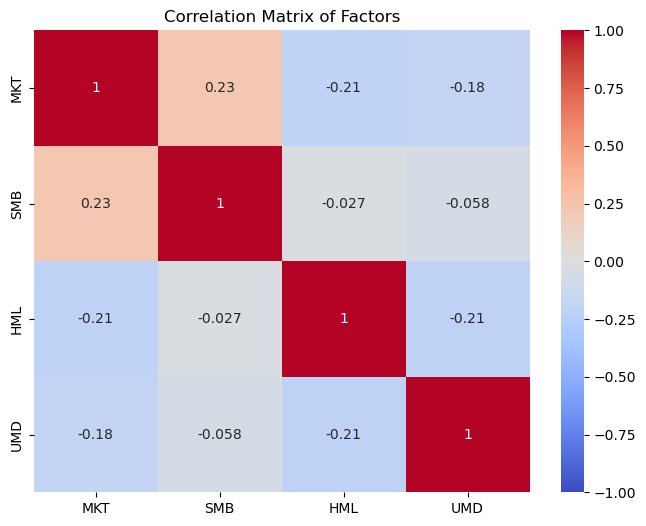

In [ ]:
#Correlation Matrix from TA Review 1
corr = factors_df[["MKT", "SMB", "HML", "UMD"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Factors')
plt.show()

#2.2 Answer
- The construction method does indeed succeed in keeping correlations small, with the highest being 0.23 and the lowest being -0.21 which are great numbers for correlation.

### 3. Cumulative Returns
Plot the cumulative returns of the factors.

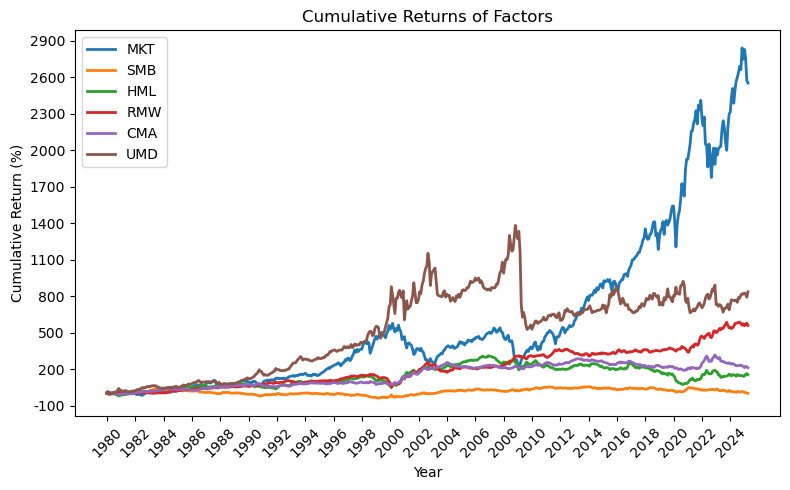

In [ ]:
#Code from 2024 Answers

factors_cum = (1 + factors_df).cumprod() - 1

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(factors_cum.index, factors_cum, lw=2)

# Add a legend.
ax.legend(factors_cum.columns, loc="upper left")

# Make xticks every year and format them as years.
ax.set_xticks(factors_cum.index[::24])
ax.set_xticklabels(factors_cum.index[::24].year, rotation=45)
ax.set_yticks(np.arange(-1, 30, 3))
ax.set_yticklabels(["{:d}".format(x * 100) for x in ax.get_yticks()])
ax.set_xlabel("Year")
ax.set_ylabel("Cumulative Return (%)")
ax.set_title("Cumulative Returns of Factors")
fig.tight_layout()

#2.3 Answer
- The market (MKT) factor has the best performance by a very large margin, then followed by momentum (UMD),value (HML), and then size (SMB).

### 4. Test Assets
The “assets” tab provides monthly excess return data on various industry stock-portfolios.
Denote these as $r^i$, for n = 1, . . . , 12.
Calculate the (annualized) univariate statistics from 1.1.


In [40]:
#Reading in portfolios data and calculating summary statistics

portfolios_df = pd.read_excel(io = "factor_pricing_data.xlsx",
                                     sheet_name='portfolios (excess returns)',
                                     index_col=0,
                                     parse_dates=[0])
#Displaying data and metrics from 1.1
display(portfolios_df.head(5))
display(metrics(portfolios_df))


,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-31,-0.0073,0.0285,0.0084,0.1009,-0.0143,0.0995,0.0348,0.0323,0.0048,0.0059,...,0.0158,0.0851,0.0466,-0.0125,0.0430,-0.0284,0.0254,0.0770,0.0306,0.0666
1980-02-29,0.0125,-0.0609,-0.0967,-0.0323,-0.0575,-0.0316,-0.0492,-0.0803,-0.0556,-0.0169,...,-0.0083,-0.0543,-0.0345,-0.0641,-0.0653,-0.0824,-0.0960,-0.0352,-0.0283,-0.0273
1980-03-31,-0.2220,-0.1119,-0.0158,-0.1535,-0.0188,-0.1272,-0.0827,-0.1238,-0.0567,-0.0670,...,-0.0819,-0.1512,-0.1602,-0.0905,-0.1450,-0.0559,-0.0877,-0.2449,-0.1261,-0.1737
1980-04-30,0.0449,0.0767,0.0232,0.0289,0.0830,-0.0529,0.0785,0.0154,0.0305,0.0115,...,0.0422,-0.0102,0.0268,0.0355,0.0539,0.0736,0.0528,0.0964,0.0458,0.0784
1980-05-31,0.0635,0.0797,0.0458,0.0866,0.0822,0.0510,0.0325,0.0888,0.0560,0.0098,...,0.0564,0.1065,0.1142,0.0877,0.1104,0.0570,0.0560,0.0889,0.0846,0.0663


,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Annualized Mean,0.090492,0.091434,0.107166,0.106462,0.139915,0.058412,0.123368,0.068678,0.077151,0.087042,...,0.088899,0.086045,0.085672,0.113451,0.099935,0.092012,0.094765,0.052189,0.113378,0.057015
Annualized Volatility,0.216219,0.149871,0.218976,0.170226,0.223470,0.246793,0.265573,0.206901,0.153228,0.226623,...,0.199184,0.200664,0.180551,0.186824,0.180939,0.214346,0.181358,0.250410,0.222876,0.209725
Annualized Sharpe Ratio,0.418519,0.610083,0.489398,0.625419,0.626101,0.236683,0.464537,0.331936,0.503504,0.384083,...,0.446317,0.428800,0.474502,0.607261,0.552316,0.429267,0.522527,0.208414,0.508704,0.271858
VaR (0.05),-0.088570,-0.059965,-0.092900,-0.066550,-0.091665,-0.106830,-0.109310,-0.086435,-0.068040,-0.101655,...,-0.089540,-0.088635,-0.078275,-0.080995,-0.074625,-0.094165,-0.078610,-0.099190,-0.103840,-0.095270


### 5. Mean-Variance Explanation
Can the difference in mean excess returns of the portfolios be explained by differences in their volatilities? Or by their VaR(.05) statistics?

- In this regression analysis, the R-squared (R²) measures how much of the variation in the dependent variable (mean excess returns of the portfolios) can be explained by the independent variable(s) (such as volatility or VaR(0.05)).
    - An R-squared of 1 means the independent variable(s) explain all the variation in the dependent variable.
    - An R-squared of 0 means they explain none of the variation.

In [43]:
#Portfolio Summary Statistics and Regression analysis
portfolio_summary = metrics(portfolios_df)

Y = portfolio_summary.loc['Annualized Mean']
X1 = portfolio_summary.loc['Annualized Volatility']
X2 = portfolio_summary.loc['VaR (0.05)']

results1 = sm.OLS(Y, sm.add_constant(X1)).fit()
results2 = sm.OLS(Y, sm.add_constant(X2)).fit()

display(results1.summary())
display(results2.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Annualized Mean   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.315
Date:                Sun, 06 Jul 2025   Prob (F-statistic):              0.257
Time:                        19:00:29   Log-Likelihood:                 122.89
No. Observations:                  49   AIC:                            -241.8
Df Residuals:                      47   BIC:                            -238.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1037      0.013      7.927      0.000       0.077       0.130
Annualized Volatility    -0.0646      0.056     -1.147      0.257      -0.178       0.049
==============================================================================
Omnibus:                        2.832   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.243   Jarque-Bera (JB):                2.139
Skew:                           0.507   Prob(JB):                        0.343
Kurtosis:                       3.138   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Annualized Mean   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     3.111
Date:                Sun, 06 Jul 2025   Prob (F-statistic):             0.0843
Time:                        19:00:29   Log-Likelihood:                 123.79
No. Observations:                  49   AIC:                            -243.6
Df Residuals:                      47   BIC:                            -239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1115      0.013      8.547      0.000       0.085       0.138
VaR (0.05)     0.2333      0.132      1.764      0.084      -0.033       0.499
==============================================================================
Omnibus:                        3.547   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.692
Skew:                           0.561   Prob(JB):                        0.260
Kurtosis:                       3.246   Cond. No.                         47.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#2.5 Answer
- No and no, because looking at the adjusted R², having 0.007 for volatility and 0.042 for Var(.05) means that the independent variables do not make much of a differece to the dependent variable with is mean excess returns.

## 3. CAPM
The Capital Asset Pricing Model (CAPM) asserts that an asset (or portfolio’s) expected excess return is completely a function of its beta to the equity market index (SPY, or in this case, MKT.)

Specifically, it asserts that, for any excess return, $\tilde{r}^i$, its mean is proportional to the mean excess return of the market, $\tilde{f}^{\text{mkt}}$, where the proportionality is the regression beta of $\tilde{r}^i$ on $\tilde{f}^{\text{mkt}}$:

$$
\mathbb{E}[\tilde{r}^i_t] = \beta^{i, \text{mkt}} \, \mathbb{E}[\tilde{f}^{\text{mkt}}_t] \tag{CAPM}
$$

Let’s examine whether that seems plausible.

### 1. Time-Series Regression
For each of the n = 12 test assets, run the CAPM time-series regression:

$$\tilde{r}_i^t = \alpha_i + \beta_{i,\text{mkt}} \tilde{f}_{\text{mkt}}^t + \epsilon_i^t $$

So you are running 12 separate regressions, each using the T-sized sample of time-series data.

In [51]:
def univariate_regression(funds, explanatory):
    results_list = []
    for col in funds.columns:
        y = funds[col]
        X = sm.add_constant(explanatory)
        res = sm.OLS(y, X, missing='drop').fit()
        alpha = res.params.iloc[0] * 12
        beta = res.params.iloc[1]
        treynor = (y.mean() / beta) * 12
        info_ratio = (alpha / res.resid.std()) * np.sqrt(12)
        results_list.append({
            'Alpha': alpha,
            'Beta': beta,
            'R-Squared': res.rsquared,
            'Treynor Ratio': treynor,
            'Information Ratio': info_ratio
        })
    return pd.DataFrame(results_list, index=funds.columns)

capm_regr = univariate_regression(portfolios_df, factors_df['MKT'])

### 2. Report Metrics
Report the estimated $\beta_{i,\text{mkt}}$, Treynor Ratio, $\alpha_i$, and Information Ratio for each of the n regressions 

In [53]:
#Dsiplay Data
from IPython.display import display
display(capm_regr)

,Alpha,Beta,R-Squared,Treynor Ratio,Information Ratio
Agric,0.022874,0.796025,0.331432,0.113680,1.552609
Food,0.042560,0.575366,0.360399,0.158914,4.260981
Soda,0.047979,0.696773,0.247584,0.153804,3.031175
Beer,0.053355,0.625208,0.329860,0.170283,4.594582
Smoke,0.087968,0.611540,0.183123,0.228791,5.226472
Toys,-0.035952,1.110894,0.495463,0.052581,-2.461089
Fun,0.012731,1.302473,0.588169,0.094719,0.896395
Books,-0.022408,1.072299,0.656805,0.064047,-2.218413
Hshld,0.018782,0.687143,0.491758,0.112278,2.063240
Clths,-0.005091,1.084627,0.560126,0.080251,-0.406441


### 3
If (CAPM) were true, what would be true of the Treynor Ratios, alphas, and Information Ratios?

#3.3 Answer

If the CAPM were true:
- Alphas: All alphas = 0. This is because, under CAPM, the expected excess return of each asset is fully explained by its beta exposure to the market, so there should be no abnormal return (alpha) left unexplained.
- Information Ratios: All information ratios = 0. IR =  alpha / SD of residuals. 
    - If alpha = 0, the IR will also = 0

- Treynor Ratios: All Treynor ratios would be the same across assets. The Treynor ratio measures excess return per unit of market risk (beta). 
    - If CAPM holds, each asset’s expected excess return is proportional to its beta, so the Treynor ratio (mean excess return divided by beta) should equal the market’s mean excess return for all assets.

- In summary:
    - Alphas = 0
    - Information Ratios = 0
    - Treynor Ratios = identical for all assets (equal to the market’s mean excess return)

### 4 
Calculate the mean-absolute-error of the estimated alphas, (one for each security $\tilde{r^i})$. 

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |\hat{\alpha}^i|
$$

If the pricing model worked, should these alpha estimates be large or small? Why? Based on your MAE stat, does this seem to support the pricing model or not?

In [54]:
alphas = capm_regr['Alpha']
n = len(alphas)
mae = sum(abs(alphas)) / n
print(f"Mean-Absolute-Error of Alphas: {mae:.4f}")

Mean-Absolute-Error of Alphas: 0.0214


#3.4 Answer

- If the pricing model worked, the alpha estimates should be very small (close to 0). This is because, under the CAPM, all expected excess returns should be explained by the market beta, leaving no abnormal return (alpha) unexplained. A large mean-absolute-error (MAE) for alphas indicates that the model is not fully capturing the returns of the assets.

- Since the MAE is 0.0214 (or 2.14% annualized), this suggests that, on average, the CAPM leaves a nontrivial amount of unexplained return for each asset. Therefore, this result does not strongly support the pricing model—the alphas are too large for comfort, and the model does not fully explain the observed returns.

## 4. A Multifactor Model 
Perhaps expected excess returns are determined by multiple factors, not just the market factor as hypothesized by the CAPM. Try the following 4-factor model: 

$$
\mathbb{E}[\tilde{r}^i] = \beta^{i,\text{mkt}} \, \mathbb{E}[\tilde{f}^{\text{mkt}}] + \beta^{i,\text{smb}} \, \mathbb{E}[\tilde{f}^{\text{smb}}] + \beta^{i,\text{hml}} \, \mathbb{E}[\tilde{f}^{\text{hml}}] + \beta^{i,\text{umd}} \, \mathbb{E}[\tilde{f}^{\text{umd}}]
$$

Let’s use regression methods to test whether the selected four pricing factors work.
For each equity security, estimate the following regression to test the 4-factor model:
$$
\tilde{r}^i_t = \alpha^i + \beta^{i,\text{mkt}} \tilde{f}^{\text{mkt}}_t + \beta^{i,\text{smb}} \tilde{f}^{\text{smb}}_t + \beta^{i,\text{hml}} \tilde{f}^{\text{hml}}_t + \beta^{i,\text{umd}} \tilde{f}^{\text{umd}}_t + \epsilon_t
$$
So you are running that regression 12 times, once for each security $\tilde{r^i}$

### 1. Time-Series Regression (Four-Factor Model)
For each regression, report the estimated $\alpha$ and r-squared. 

In [57]:
def multivariate_regression(responses, explanatory):
    results = []
    for col in responses.columns:
        y = responses[col]
        X = sm.add_constant(explanatory)
        res = sm.OLS(y, X, missing='drop').fit()
        summary = {'Alpha': res.params.iloc[0] * 12, 'R-Squared': res.rsquared}
        summary.update({f"{name} Beta": val for name, val in zip(explanatory.columns, res.params.iloc[1:])})
        results.append(summary)
    return pd.DataFrame(results, index=responses.columns)

four_factor_model = multivariate_regression(portfolios_df, factors_df)

display(four_factor_model)

,Alpha,R-Squared,MKT Beta,SMB Beta,HML Beta,RMW Beta,CMA Beta,UMD Beta
Agric,0.002660,0.362180,0.811475,0.345581,0.105829,0.147576,0.121681,0.067882
Food,-0.005677,0.488061,0.728636,-0.077423,-0.023429,0.488977,0.473676,0.017354
Soda,0.008270,0.314163,0.821395,-0.013326,0.013597,0.522849,0.431630,-0.108727
Beer,0.000442,0.446604,0.785799,-0.093377,-0.185426,0.590379,0.518917,0.059522
Smoke,0.027091,0.296720,0.816547,-0.115533,-0.057717,0.634696,0.755234,-0.063784
Toys,-0.050608,0.561517,1.075256,0.604414,-0.185716,0.513906,0.274704,-0.185726
Fun,0.043328,0.619023,1.184806,0.245768,0.036284,-0.022085,-0.253310,-0.240984
Books,-0.041202,0.706983,1.092305,0.296320,0.209046,0.316944,0.048811,-0.092439
Hshld,-0.021537,0.588175,0.810782,-0.052003,-0.226577,0.496368,0.517598,-0.010216
Clths,-0.030855,0.645007,1.095235,0.407968,-0.031047,0.763624,0.062932,-0.206190


### 2
Calculate the mean-absolute-error of the estimated alphas (one for each security, $\tilde{r}^i$):

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |\hat{\alpha}^i|
$$

If the pricing model worked, should these alpha estimates be large or small? Why? Based on your MAE stat, does this seem to support the pricing model or not?

In [59]:
alphas = four_factor_model['Alpha']
n = len(alphas)
mae = sum(abs(alphas)) / n
print(f"Mean-Absolute-Error of Alphas: {mae:.4f}")

Mean-Absolute-Error of Alphas: 0.0287


#4.2 Answer
- If the pricing model worked, the alpha estimates should be very small (close to 0), because the model should explain all expected excess returns. Since the MAE is 0.0287 (2.87% annualized), this indicates the model leaves a significant amount of unexplained return. Therefore, this result does not support the pricing model—the alphas are too large for comfort.